In [1]:
import rpi_keypoints as test

cuda:1


In [4]:
import sys
sys.path.insert(1, '/home/users/aeron/ag/AlphaGarden/Center-Tracking')

# import key_point_id as kp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import cv2

In [5]:
# model = kp.init_model(model_path = '../models/rpi_model.pth', cuda_device='cuda:1')

In [6]:
with open("/home/users/aeron/ag/keypoints/UDA4POC/train_setup/rpi/open_areas_small.pkl",'rb') as f:
    images = pickle.load(f)

imk = list(images.keys())

In [7]:
choice = random.choice(imk)
# choice = '2021-08-22T02:49:38.080Z_610.2_1060.0_0.0.jpg'
# choice = '2021-08-06T03:05:16.898Z_890.0_930.0_0.0.jpg'
print(choice)
img = images[choice]

2021-08-06T03:09:20.603Z_900.0_930.0_0.0.jpg


In [ ]:
temp  = test.generate_image(img)
plt.Figure()
plt.imshow(temp[0])
plt.Figure()
plt.imshow(temp[1])

In [8]:
pts = test.find_points(img)

[ 85 168]
(139, 189, 159) (216, 201, 192)
[89 73]
(195, 207, 188) (0, 0, 0)
[108  73]
(222, 237, 214) (0, 0, 0)
[ 99 182]
(113, 176, 159) (0, 0, 0)


/home/users/aeron/ag/agenv/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


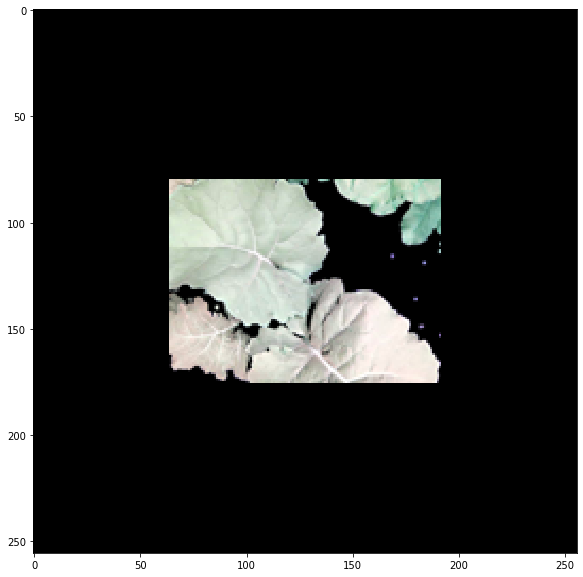

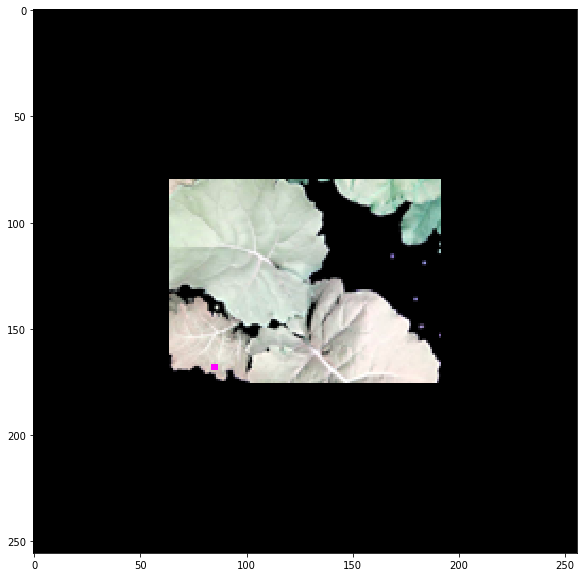

In [9]:
# t = kp.eval_image(img,model, device = 1)
# print(round(t[1].sum().item()))
# pts = kp.recursive_cluster(t[0],round(t[1].sum().item()),img)
mask = np.copy(img)
for x,y in pts:
    x,y = int(x), int(y)
    mask = cv2.rectangle(mask,(x-1,y-1),(x+1,y+1), (255,0,255),-1)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.figure(figsize=(10,10))
plt.imshow(mask)

In [9]:
t = kp.transf(kp.Image.fromarray(img)).unsqueeze(0).cuda(1)
pts = kp.recursive_cluster(t[0],round(t[1].sum.item()),np.ones(t[0].shape[:2]))

IndexError: index 1 is out of bounds for dimension 0 with size 1